In [325]:
from __future__ import print_function, division
import requests
import math
from bs4 import BeautifulSoup
import pandas as pd
from collections import defaultdict
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold
from sklearn.linear_model import ElasticNet
from sklearn.cross_validation import cross_val_score
from sklearn import feature_selection as f_select
import re
%matplotlib inline

In [326]:
pitching = pd.read_csv('../Project_2/Pitchingdata.csv')
batting = pd.read_csv('../Project_2/battersdata.csv')
salaries = pd.read_csv('../Project_2/salariesdata.csv')

In [327]:
salaries = salaries.drop(["Pos'n", "MLS"], axis=1)

In [328]:
#lets remove all of those nasty characters from our names so we can merge easily
from string import printable

batting['Name'] = batting['Name'].apply(lambda x: x.split('*',1)[0])
batting['Name'] = batting['Name'].apply(lambda x: x.split('#',1)[0])
batting['Name'] = batting['Name'].apply(lambda x: x.split('\\',1)[0])
batting['Name'] = batting['Name'].apply(lambda x: re.sub("[^{}]+".format(printable), " ", x))
batting['Name'] = batting['Name'].apply(lambda x: x.split(' ',1)[-1] + ',' + ' ' + x.split(' ',1)[0])

In [329]:
#Lets do the same thing with the pitching data
pitching['Name'] = pitching['Name'].apply(lambda x: x.split('*',1)[0])
pitching['Name'] = pitching['Name'].apply(lambda x: x.split('#',1)[0])
pitching['Name'] = pitching['Name'].apply(lambda x: x.split('\\',1)[0])
pitching['Name'] = pitching['Name'].apply(lambda x: re.sub("[^{}]+".format(printable), " ", x))
pitching['Name'] = pitching['Name'].apply(lambda x: x.split(' ',1)[-1] + ',' + ' ' + x.split(' ',1)[0])



In [330]:
#narrow down our sample to only players with more than 200 at bats this year
batting2 = batting[batting['AB'] >= 200]

In [331]:
#narrow down our sample to only players with more than 30 games played this year
pitching2 = pitching[pitching['G'] >= 30]

In [332]:
salaries.rename(columns={'Player':'Name', '2017' : 'Salary'},inplace = True)

In [333]:
def money_to_int(moneystring):
    moneystring = moneystring.replace('$', '').replace(',', '').replace(' ','')
    return int(moneystring)

In [334]:
salaries['Salary'] = salaries['Salary'].apply(lambda x: money_to_int(x))

In [335]:
salaries['Salary'].mode()

0    535000
dtype: int64

In [336]:
#lets merge our salaries dataframe with our pitching dataframe 

pitchdf = pd.merge(salaries, pitching2, on=['Name'])

In [337]:
batdf = pd.merge(salaries, batting2, on=['Name'])

# Challenge 1

In [338]:
#Now that we have our mostly cleaned data sets let's start on part 1
#We need to add a colmun of ones to our data set and use that to model salary.
batdf.loc[:,'ones'] = 1

In [339]:
# Define the model
lm1 = smf.ols('Salary ~ ones', data=batdf)

# Fit the model
fit1 = lm1.fit()
# Print summary statistics of the model's performance
fit1.summary()

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Tue, 30 Jan 2018   Prob (F-statistic):                nan
Time:                        09:35:23   Log-Likelihood:                -5452.2
No. Observations:                 318   AIC:                         1.091e+04
Df Residuals:                     317   BIC:                         1.091e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.238e+06    1.9e+05     17.061      0.000    2.86e+06    3.61e+06
ones        3.238e+06    1.9e+05     17.061      0.000    2.86e+06    3.61e+06
==============================================================================
Omnibus:                       48.423   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.221
Skew:                           1.118   Prob(JB):                     2.53e-15
Kurtosis:                       3.272   Cond. No.                     1.21e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.35e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

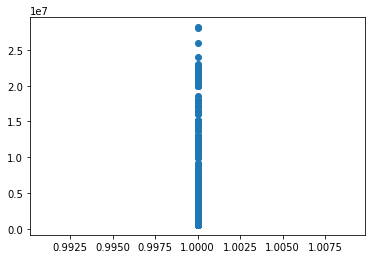

In [340]:
x_ax = list(batdf['ones'])
predictions = []
for item in x_ax:
    predictions.append(3238000 + 3238000 * item)
plt.scatter(batdf['ones'],batdf['Salary'])
plt.plot(x_ax, predictions, color='red')

Here we can see that the model resulted in a straight line.

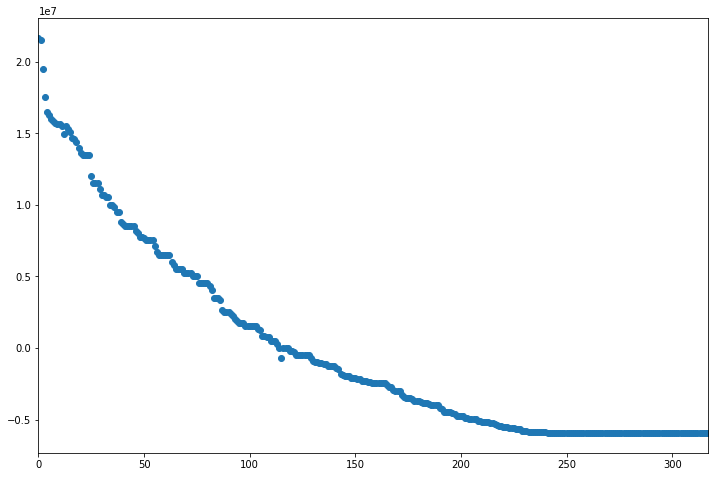

In [341]:
fit1.resid.plot(style='o', figsize=(12,8));

The residuals appear to follow a chi-squared distribution.

# Challenge 2

In [342]:
# Define the model
lm1 = smf.ols('Salary ~ Age', data=batdf)

# Fit the model
fit1 = lm1.fit()
# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     183.6
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           2.73e-33
Time:                        09:35:23   Log-Likelihood:                -5379.4
No. Observations:                 318   AIC:                         1.076e+04
Df Residuals:                     316   BIC:                         1.077e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.571e+07   2.39e+06    -10.737      0.000   -3.04e+07    -2.1e+07
Age         1.112e+06   8.21e+04     13.550      0.000    9.51e+05    1.27e+06
==============================================================================
Omnibus:                       56.271   Durbin-Watson:                   0.497
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.534
Skew:                           0.994   Prob(JB):                     6.62e-22
Kurtosis:                       4.846   Cond. No.                         231.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [343]:
set(batdf['Age'])

{21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 40.0}

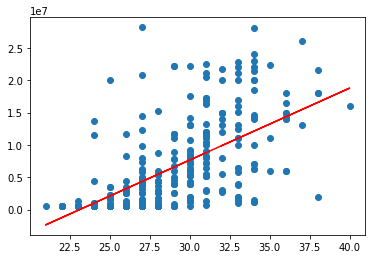

In [344]:
x_ax = list(set(batdf['Age']))
predictions = []
for item in x_ax:
    predictions.append(-25710000 + 1112000 * item)
plt.scatter(batdf['Age'],batdf['Salary'])
plt.plot(x_ax, predictions, color='red')




In this model we are attempting to predict the salary a player will make with respect to his age.

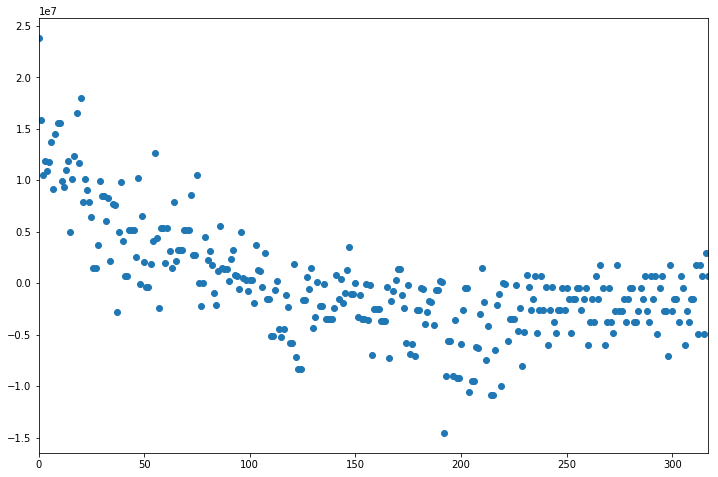

In [345]:
fit1.resid.plot(style='o', figsize=(12,8));

# Challenge 3


In this challenge we will add dummy variables for the team of the player.

In [346]:
set(batdf['Tm'])

{'ARI',
 'ATL',
 'BAL',
 'BOS',
 'CHC',
 'CHW',
 'CIN',
 'CLE',
 'COL',
 'DET',
 'HOU',
 'KCR',
 'LAA',
 'LAD',
 'MIA',
 'MIL',
 'MIN',
 'NYM',
 'NYY',
 'OAK',
 'PHI',
 'PIT',
 'SDP',
 'SEA',
 'SFG',
 'STL',
 'TBR',
 'TEX',
 'TOR',
 'TOT',
 'WSN'}

In [347]:
X=patsy.dmatrix('Tm',data=batdf,return_type='dataframe')
X.head()

,Intercept,Tm[T.ATL],Tm[T.BAL],Tm[T.BOS],Tm[T.CHC],Tm[T.CHW],Tm[T.CIN],Tm[T.CLE],Tm[T.COL],Tm[T.DET],...,Tm[T.PIT],Tm[T.SDP],Tm[T.SEA],Tm[T.SFG],Tm[T.STL],Tm[T.TBR],Tm[T.TEX],Tm[T.TOR],Tm[T.TOT],Tm[T.WSN]
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [348]:
batdf2=batdf.join(X)

In [349]:
batdf2.columns[30]

'Pos\xa0Summary'

In [350]:
y = batdf2['Salary']
x = batdf2.drop(['Name', 'Age','Salary', 'Rk', 'Tm', 'Lg', 'G', 'PA', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG',
       'OPS', 'OPS+', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB', 'Pos\xa0Summary','ones'],1)

lsm = sm.OLS(y,x)
fit4 = lsm.fit()
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     1.260
Date:                Tue, 30 Jan 2018   Prob (F-statistic):              0.171
Time:                        09:35:24   Log-Likelihood:                -5432.5
No. Observations:                 318   AIC:                         1.093e+04
Df Residuals:                     287   BIC:                         1.104e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.514e+06   2.11e+06      1.661      0.098   -6.49e+05    7.68e+06
Tm[T.ATL]    5.17e+06   3.07e+06      1.682      0.094   -8.79e+05    1.12e+07
Tm[T.BAL]   4.285e+06   2.86e+06      1.496      0.136   -1.35e+06    9.92e+06
Tm[T.BOS]   2.835e+06   2.99e+06      0.948      0.344   -3.05e+06    8.72e+06
Tm[T.CHC]   2.879e+06   2.99e+06      0.963      0.337   -3.01e+06    8.77e+06
Tm[T.CHW]   1.358e+06   3.07e+06      0.442      0.659   -4.69e+06    7.41e+06
Tm[T.CIN]   4.088e+05   3.07e+06      0.133      0.894   -5.64e+06    6.46e+06
Tm[T.CLE]   2.168e+06   2.99e+06      0.725      0.469   -3.72e+06    8.05e+06
Tm[T.COL]   3.744e+06   3.17e+06      1.180      0.239    -2.5e+06    9.99e+06
Tm[T.DET]   6.423e+06   2.99e+06      2.148      0.033    5.36e+05    1.23e+07
Tm[T.HOU]   3.055e+06   2.99e+06      1.021      0.308   -2.83e+06    8.94e+06
Tm[T.KCR]   6.161e+06   3.17e+06      1.942      0.053   -8.26e+04    1.24e+07
Tm[T.LAA]   5.059e+06   2.92e+06      1.731      0.084   -6.93e+05    1.08e+07
Tm[T.LAD]   2.516e+06   2.99e+06      0.841      0.401   -3.37e+06     8.4e+06
Tm[T.MIA]   5.676e+05   3.17e+06      0.179      0.858   -5.68e+06    6.81e+06
Tm[T.MIL]  -6.797e+05   2.99e+06     -0.227      0.820   -6.57e+06    5.21e+06
Tm[T.MIN]   4.809e+05   2.92e+06      0.165      0.869   -5.27e+06    6.23e+06
Tm[T.NYM]   6.974e+06   2.81e+06      2.479      0.014    1.44e+06    1.25e+07
Tm[T.NYY]   4.272e+06   2.99e+06      1.428      0.154   -1.61e+06    1.02e+07
Tm[T.OAK]   -1.09e+05    3.3e+06     -0.033      0.974    -6.6e+06    6.38e+06
Tm[T.PHI]  -1.175e+06   3.17e+06     -0.371      0.711   -7.42e+06    5.07e+06
Tm[T.PIT]   1.843e+06   2.99e+06      0.616      0.538   -4.04e+06    7.73e+06
Tm[T.SDP]   -1.94e+06    3.3e+06     -0.589      0.557   -8.43e+06    4.55e+06
Tm[T.SEA]   3.109e+06   2.99e+06      1.040      0.299   -2.78e+06       9e+06
Tm[T.SFG]   4.399e+06   3.07e+06      1.432      0.153   -1.65e+06    1.04e+07
Tm[T.STL]   1.954e+06   2.99e+06      0.653      0.514   -3.93e+06    7.84e+06
Tm[T.TBR]  -2.146e+05   2.92e+06     -0.073      0.942   -5.97e+06    5.54e+06
Tm[T.TEX]   4.523e+06   2.99e+06      1.512      0.132   -1.36e+06    1.04e+07
Tm[T.TOR]   5.625e+06   2.92e+06      1.925      0.055   -1.26e+05    1.14e+07
Tm[T.TOT]   4.582e+06   2.48e+06      1.851      0.065   -2.91e+05    9.46e+06
Tm[T.WSN]   4.501e+06   2.99e+06      1.505      0.133   -1.39e+06    1.04e+07
==============================================================================
Omnibus:                       41.338   Durbin-Watson:                   0.225
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.656
Skew:                           0.982   Prob(JB):                     2.23e-12
Kurtosis:                       3.434   Cond. No.                         32.5
==

If we take the coefficient of T.SEA (which equals 3,109,000) we can interpret this by saying that if a player is on the Seattle Mariners then we expect them to make $3,109,000 more than if they played for our base case team which is the Arizona Diamondbacks.  

# Challenge 4

In this challenge we need to improve the model by adding more features and/or transforming existing ones.

In [351]:
#I think that salary needs to be transformed into log_salary
batdf2['log_salary'] = np.log(batdf2.Salary)
batdf2['Intercept'] = np.log(batdf2.Intercept)

In [393]:
y = batdf2['log_salary']
x = batdf.drop(['Name','BB','Salary','SLG','OBP','PA','SB','OPS' ,'Rk', 'Tm', 'Lg', 'H',
       '2B', '3B', 'HR', 'CS', 'TB','BA', 'GDP', 'HBP', 'OPS+','SH', 'SF', 'IBB', 'Pos\xa0Summary'],1)

lsm = sm.OLS(y,x)
fit4 = lsm.fit()
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     84.08
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           3.78e-62
Time:                        10:44:08   Log-Likelihood:                -389.50
No. Observations:                 318   AIC:                             793.0
Df Residuals:                     311   BIC:                             819.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.2482      0.013     19.158      0.000       0.223       0.274
G             -0.0222      0.004     -5.403      0.000      -0.030      -0.014
AB             0.0048      0.001      4.258      0.000       0.003       0.007
R              0.0141      0.004      3.284      0.001       0.006       0.023
RBI            0.0076      0.003      2.342      0.020       0.001       0.014
SO            -0.0061      0.002     -3.516      0.001      -0.010      -0.003
ones           7.7777      0.468     16.614      0.000       6.857       8.699
==============================================================================
Omnibus:                        0.984   Durbin-Watson:                   1.007
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                1.050
Skew:                          -0.065   Prob(JB):                        0.591
Kurtosis:                       2.751   Cond. No.                     4.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Challenge 5

In this section we will use test data and training data to test the accuracy of the predictions.

In [353]:
lr = LinearRegression()

# INSTRUCTOR NOTE: Run this multiple times to show the variation
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
# Fit the model against the training data
lr.fit(X_train, y_train)
# Evaluate the model against the testing data
lr.score(X_test, y_test)
lr.fit(x,y)
lr.coef_


array([ 0.24726092, -0.0227205 ,  0.00432607,  0.0168875 ,  0.00984683,
       -0.00643998, -0.71929258,  0.        ])

In [363]:
np.dot(lr.coef_,np.array(x)[10])

7.0127433139873547

Text(0,0.5,'Predicted outcome')

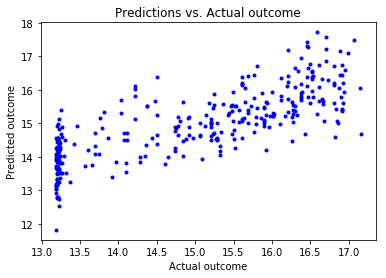

In [381]:
y_predicted = fit4.predict(x)
y_predicted

plt.plot(y, y_predicted, 'b.')
plt.title('Predictions vs. Actual outcome')
plt.xlabel('Actual outcome')
plt.ylabel('Predicted outcome')

In [372]:
y_sorted = y_predicted.sort_values(ascending = False)

In [390]:
batdf

,Name,Salary,Rk,Age,Tm,Lg,G,PA,AB,R,...,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos Summary,ones
0,"Heyward, Jason",28166667,611.0,27.0,CHC,NL,126,481,432,59,...,0.715,85.0,168,8,3,2,2,1,*98,1
1,"Cabrera, Miguel",28000000,189.0,34.0,DET,AL,130,529,469,50,...,0.728,92.0,187,15,3,0,3,6,*3D,1
2,"Pujols, Albert",26000000,1049.0,37.0,LAA,AL,149,636,593,53,...,0.672,81.0,229,26,2,0,4,5,*D/3,1
3,"Cano, Robinson",24000000,204.0,34.0,SEA,AL,150,648,592,79,...,0.791,112.0,268,18,4,0,3,8,*4,1
4,"Mauer, Joe",23000000,824.0,34.0,MIN,AL,141,597,525,69,...,0.801,116.0,219,17,3,0,3,3,*3D,1
5,"Ramirez, Hanley",22750000,1059.0,33.0,BOS,AL,133,553,496,58,...,0.750,95.0,213,15,6,0,0,8,D3,1
6,"Cespedes, Yoenis",22500000,230.0,31.0,NYM,NL,81,321,291,46,...,0.892,132.0,157,7,2,0,2,5,7/D,1
7,"Gonzalez, Adrian",22357143,505.0,35.0,LAD,NL,71,252,231,14,...,0.642,69.0,82,7,0,0,4,1,3,1
8,"Posey, Buster",22177778,1035.0,30.0,SFG,NL,140,568,494,62,...,0.861,129.0,228,17,8,0,5,13,23/D,1
9,"Upton, Justin",22125000,1341.0,29.0,TOT,AL,152,635,557,100,...,0.901,135.0,301,9,3,0,1,3,*7,1


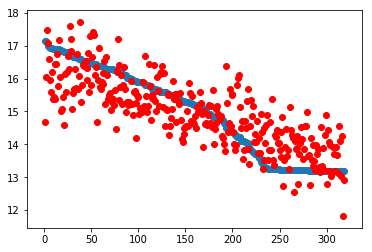

In [379]:
predictions = []
i = 0
while i < len(x):
    predictions.append(np.dot(lr.coef_, np.array(x)[i]))
    i = i + 1
plt.scatter(range(1,319),batdf2['log_salary'])
plt.scatter(range(1,319), y_predicted, color='red')


In [357]:
# 10-fold cross-validation
reg = LinearRegression()
scores = cross_val_score(reg, x, y, cv=10, scoring='mean_squared_error')

# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print(-scores)

[ 1.56550077  0.51735369  0.75790373  0.5214532   0.48140938  0.21824866
  1.27529403  1.14841375  1.09621652  0.66675893]


/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0

In [358]:
est=LinearRegression()
X = batdf2.drop(['log_salary','Salary','Tm','Lg','Pos\xa0Summary','ones','Name'],1)

kf=KFold(n=len(X),n_folds=5,shuffle=True)

all_scores=[]

# Instead of using cross_val_score, let's use sklearn.cross_validation.KFold; this will allow
# us to 'manipulate' our training set, 

# get indices of corresponding train & test
for train,test in kf:
    x_train=X.iloc[train]
    y_train=y.iloc[train]
    x_test=X.iloc[test]
    y_test=y.iloc[test]
    pvals=[]
    sig_cols=[]
    
    for feature in x_train.columns:
        pval=f_select.f_regression(x_train[[feature]],y_train)
        if pval[1][0]<.02: 
            sig_cols.append(feature)
            pvals.append(pval[1][0])
            
    est.fit(x_train[sig_cols],y_train)
    r_2=est.score(x_test[sig_cols],y_test)
    all_scores.append(r_2)
        
np.mean(all_scores)
    

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


0.54163452128188183